# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [7]:
import torch
import numpy as np

# PART 1: Data Generation (The Exclusion Zone)



GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


System Initialized. Training on 2100 sensors. Validating on 900 sensors.
Initiating Calibration Sequence (Training)...
Epoch 200/2000 | Loss: 0.6160 | Val Loss: 0.6027 | Train Acc: 0.5676 | Val Acc: 0.6022
Epoch 400/2000 | Loss: 0.5776 | Val Loss: 0.5695 | Train Acc: 0.6600 | Val Acc: 0.6756
Epoch 600/2000 | Loss: 0.5382 | Val Loss: 0.5253 | Train Acc: 0.6867 | Val Acc: 0.6967
Epoch 800/2000 | Loss: 0.4786 | Val Loss: 0.4740 | Train Acc: 0.7352 | Val Acc: 0.7478
Epoch 1000/2000 | Loss: 0.4099 | Val Loss: 0.4165 | Train Acc: 0.8186 | Val Acc: 0.8067
Epoch 1200/2000 | Loss: 0.3497 | Val Loss: 0.3696 | Train Acc: 0.8771 | Val Acc: 0.8667
Epoch 1400/2000 | Loss: 0.3211 | Val Loss: 0.3472 | Train Acc: 0.8986 | Val Acc: 0.8778
Epoch 1600/2000 | Loss: 0.3005 | Val Loss: 0.3325 | Train Acc: 0.9114 | Val Acc: 0.8911
Epoch 1800/2000 | Loss: 0.2922 | Val Loss: 0.3263 | Train Acc: 0.9167 | Val Acc: 0.8911
Epoch 2000/2000 | Loss: 0.2860 | Val Loss: 0.3218 | Train Acc: 0.9224 | Val Acc: 0.8967


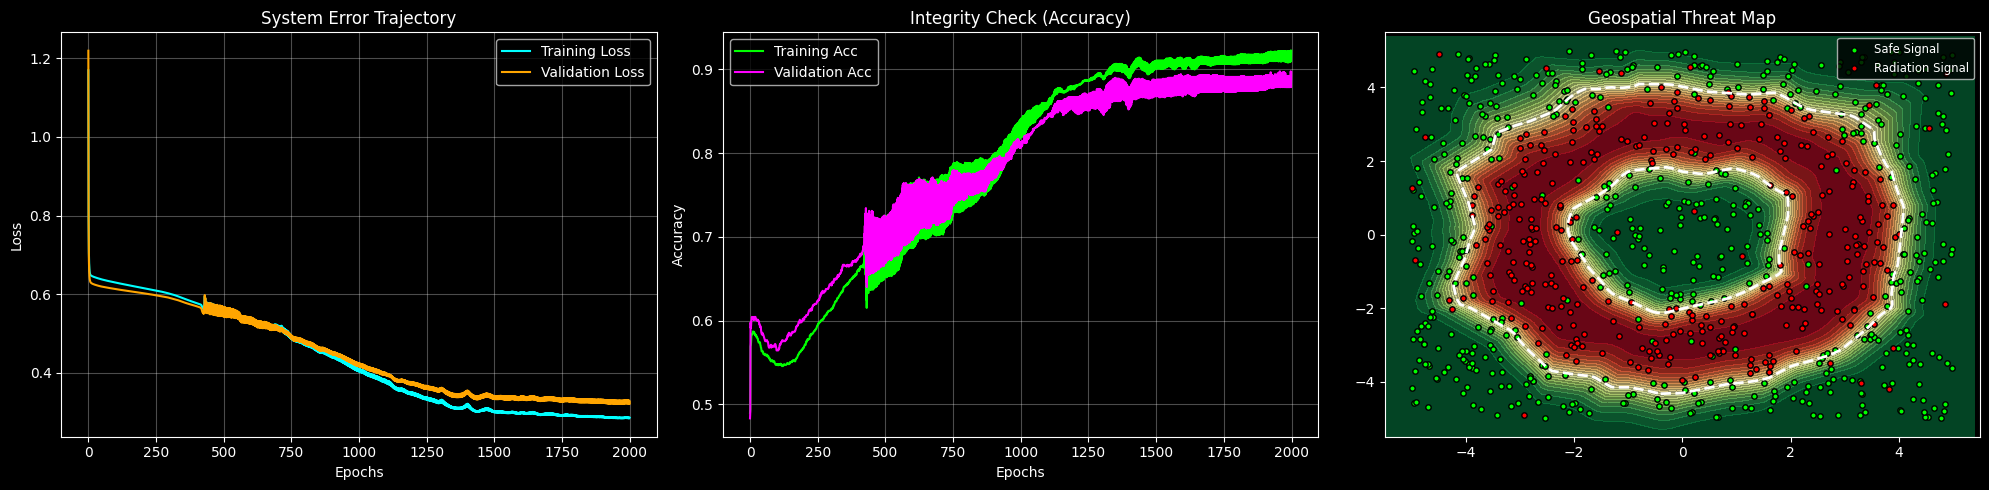

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# SECTION 1: SYSTEM INITIALIZATION & DATA SPLITTING


# Ensure reproducibility with the Group Number
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)


X_np = X_full.numpy()
y_np = y_full.numpy()
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_np, y_np, test_size=0.3, random_state=GROUP_NUMBER
)

# Convert back to PyTorch tensors
X_train = torch.FloatTensor(X_train_np)
y_train = torch.FloatTensor(y_train_np)
X_val = torch.FloatTensor(X_val_np)
y_val = torch.FloatTensor(y_val_np)

print(f"System Initialized. Training on {len(X_train)} sensors. Validating on {len(X_val)} sensors.")


# SECTION 2: ARCHITECT THE FILTER (MANUAL MLP SETUP)


def init_weights(fan_in, fan_out):

    std = np.sqrt(2.0 / fan_in)

    w = torch.randn(fan_in, fan_out) * std
    w = w.detach()
    w.requires_grad = True
    return w

def init_bias(n):
    return torch.zeros(1, n, requires_grad=True)


W1 = init_weights(2, 16)
b1 = init_bias(16)

W2 = init_weights(16, 16)
b2 = init_bias(16)

W3 = init_weights(16, 16)
b3 = init_bias(16)

W4 = init_weights(16, 1) # Output layer
b4 = init_bias(1)

# parameters
params = [W1, b1, W2, b2, W3, b3, W4, b4]

# Hyperparameters
learning_rate = 0.05
epochs = 2000

# Telemetry Storage
train_losses = []
val_losses = []
train_accs = []
val_accs = []


# SECTION 3: MANUAL CALIBRATION (TRAINING LOOP)


print("Initiating Calibration Sequence (Training)...")

for epoch in range(epochs):

    #1. Forward Pass (Training)
    z1 = torch.matmul(X_train, W1) + b1
    a1 = torch.relu(z1)

    z2 = torch.matmul(a1, W2) + b2
    a2 = torch.relu(z2)

    z3 = torch.matmul(a2, W3) + b3
    a3 = torch.relu(z3)

    z4 = torch.matmul(a3, W4) + b4
    y_pred = torch.sigmoid(z4)

    #2. Loss Calculation (Manual Binary Cross Entropy)
    epsilon = 1e-7
    y_pred_clamped = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = -torch.mean(y_train * torch.log(y_pred_clamped) + (1 - y_train) * torch.log(1 - y_pred_clamped))

    #3. Backward Pass (Autograd)
    loss.backward()

    #4. Metrics & Validation (No Grad)

    with torch.no_grad():
        # Forward Pass Validation
        z1_v = torch.matmul(X_val, W1) + b1
        a1_v = torch.relu(z1_v)
        z2_v = torch.matmul(a1_v, W2) + b2
        a2_v = torch.relu(z2_v)
        z3_v = torch.matmul(a2_v, W3) + b3
        a3_v = torch.relu(z3_v)
        z4_v = torch.matmul(a3_v, W4) + b4
        y_val_pred = torch.sigmoid(z4_v)

        # Validation Loss
        y_val_pred_clamped = torch.clamp(y_val_pred, epsilon, 1 - epsilon)
        val_loss = -torch.mean(y_val * torch.log(y_val_pred_clamped) + (1 - y_val) * torch.log(1 - y_val_pred_clamped))

        # Accuracy Calculation (Threshold = 0.5)
        train_acc = ((y_pred >= 0.5).float() == y_train).float().mean().item()
        val_acc = ((y_val_pred >= 0.5).float() == y_val).float().mean().item()

    # Store history
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    #5. Optimization (Manual SGD)
    with torch.no_grad():
        for p in params:
            p -= learning_rate * p.grad # Update weights in-place
            p.grad.zero_()             # Reset gradients

    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
    

# SECTION 4: THE GDC DASHBOARD (VISUALIZATION)


fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.style.use('dark_background')

# Panel 1: Error Trajectory
axes[0].plot(train_losses, label='Training Loss', color='cyan')
axes[0].plot(val_losses, label='Validation Loss', color='orange')
axes[0].set_title('System Error Trajectory')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel 2: Integrity Check
axes[1].plot(train_accs, label='Training Acc', color='lime')
axes[1].plot(val_accs, label='Validation Acc', color='magenta')
axes[1].set_title('Integrity Check (Accuracy)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Panel 3: Geospatial Threat Map (Decision Boundary)
# Generate a grid of points to map the decision boundary
x_min, x_max = -5.5, 5.5
y_min, y_max = -5.5, 5.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

with torch.no_grad():
    # Forward pass the entire grid
    z1_g = torch.matmul(grid_tensor, W1) + b1
    a1_g = torch.relu(z1_g)
    z2_g = torch.matmul(a1_g, W2) + b2
    a2_g = torch.relu(z2_g)
    z3_g = torch.matmul(a2_g, W3) + b3
    a3_g = torch.relu(z3_g)
    z4_g = torch.matmul(a3_g, W4) + b4
    Z_grid = torch.sigmoid(z4_g).view(xx.shape).numpy()

# Draw Decision Boundary
axes[2].contourf(xx, yy, Z_grid, levels=20, cmap='RdYlGn_r', alpha=0.6)
axes[2].contour(xx, yy, Z_grid, levels=[0.5], colors='white', linewidths=2, linestyles='--')

# Overlay Validation Data
safe_mask = (y_val.flatten() == 0).numpy()
dead_mask = (y_val.flatten() == 1).numpy()
axes[2].scatter(X_val_np[safe_mask, 0], X_val_np[safe_mask, 1], c='lime', s=15, label='Safe Signal', edgecolors='black')
axes[2].scatter(X_val_np[dead_mask, 0], X_val_np[dead_mask, 1], c='red', s=15, label='Radiation Signal', edgecolors='black')

axes[2].set_title('Geospatial Threat Map')
axes[2].legend(loc='upper right', fontsize='small')
axes[2].set_xlim(-5.5, 5.5)
axes[2].set_ylim(-5.5, 5.5)

plt.tight_layout()
plt.show()